In [1]:
import pandas as pd

In [ ]:
screens = [
    'Human_InVitro_294T_Apobec_D14_Input.txt',
    'Human_InVitro_294T_TadA_D14_Input.txt',
    'Human_InVitro_SK-ES_Apobec_D14_Input.txt',
    'Human_InVitro_SK-ES_TadA_D17_Input.txt',
    'Human_InVitro_SW480_Apobec_D14_Input.txt',
    'Human_InVitro_SW480_TadA_D14_Input.txt',
    ]
workdir = '../tests'
input_gene = 'SETDB1'
input_uniprot = 'Q15047'

## preprocess_be_results.py (3.1)

In [2]:
from preprocess_be_results import parse_base_editing_results

Human_InVitro_294T_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 5203.0 0.27775308830665546
Nonsense vs No mutation: 2506.0 0.2608706384740007
Nonsense vs Silent: 1803.0 0.24557416370880203
No mutation vs Silent: 10178.0 0.9214706032590196

Human_InVitro_294T_TadA_D14_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 8506.0 0.8707578845218364

Human_InVitro_SK-ES_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edi

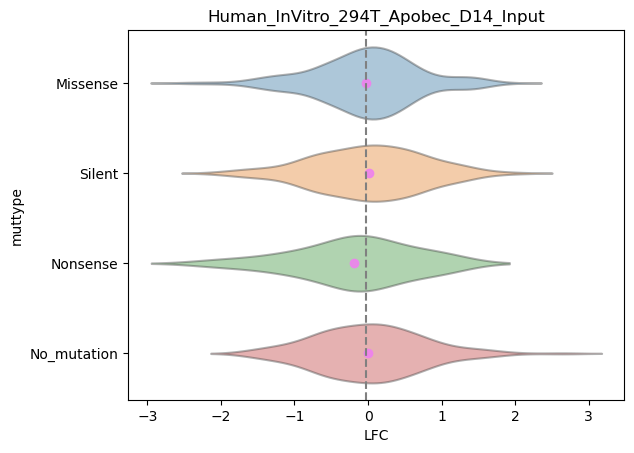

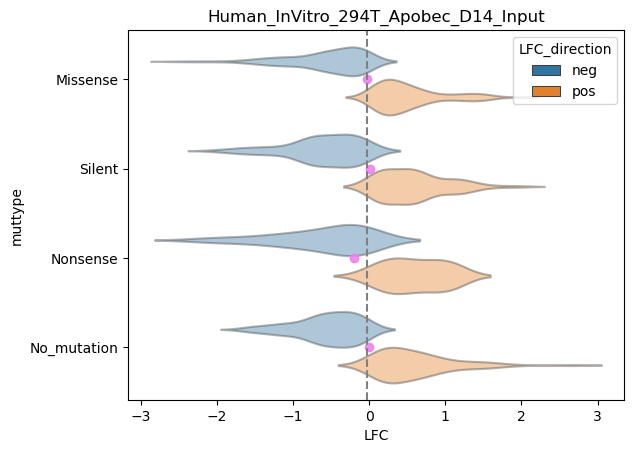

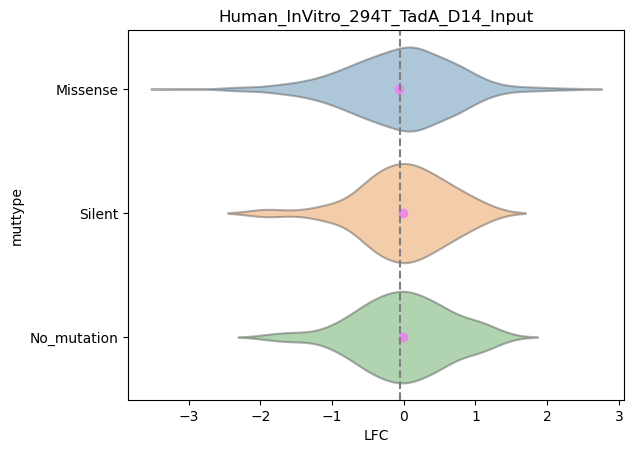

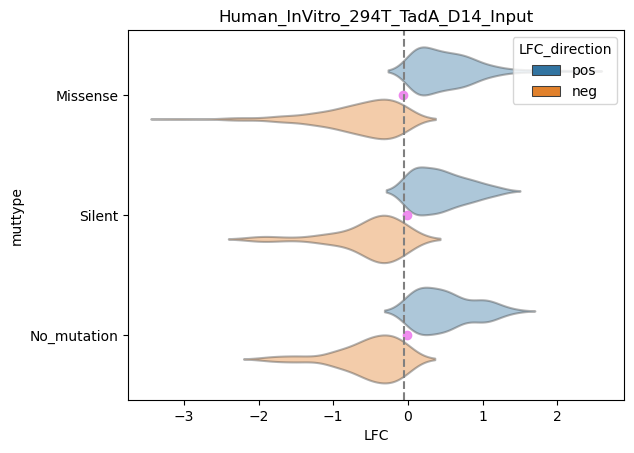

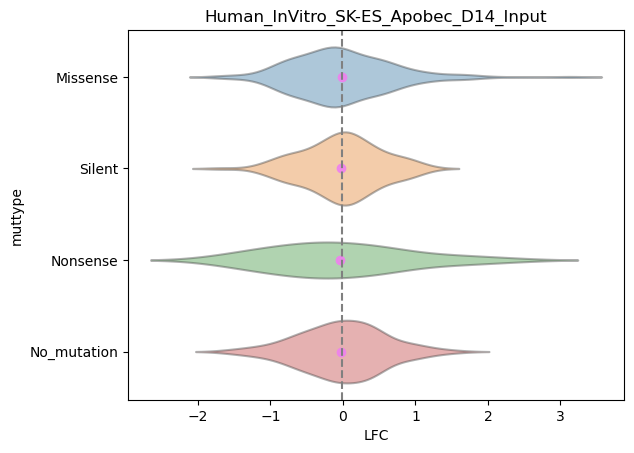

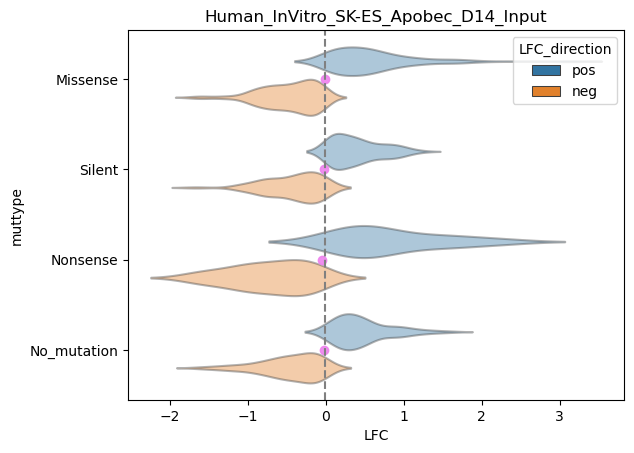

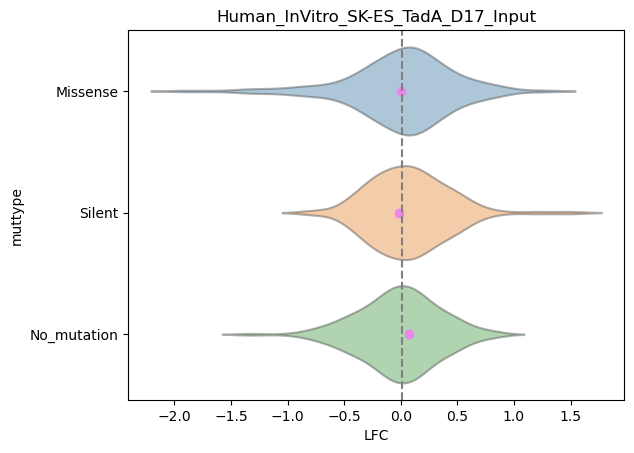

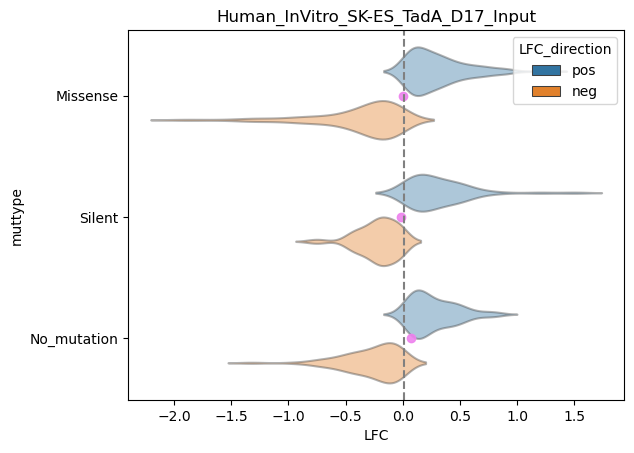

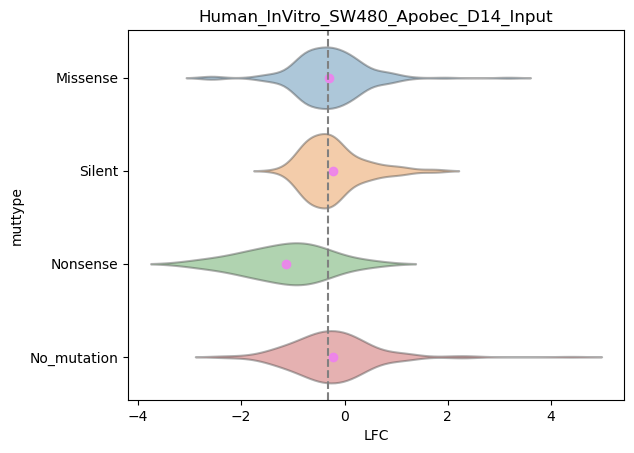

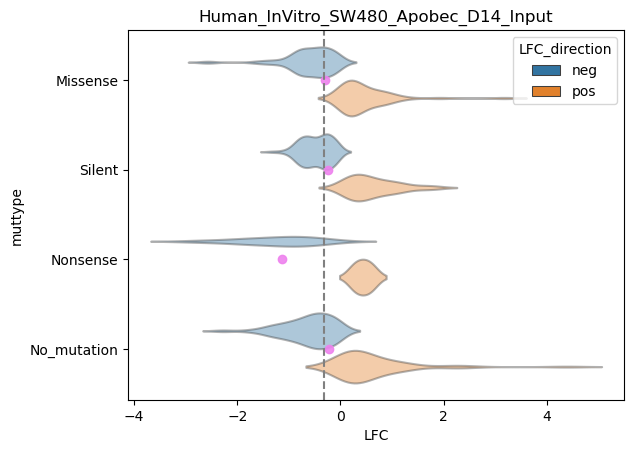

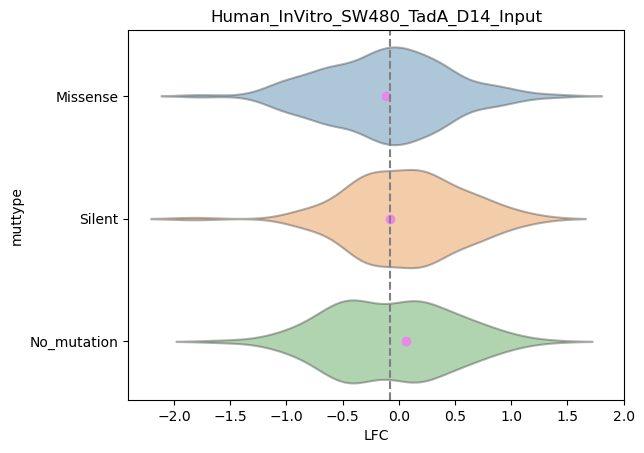

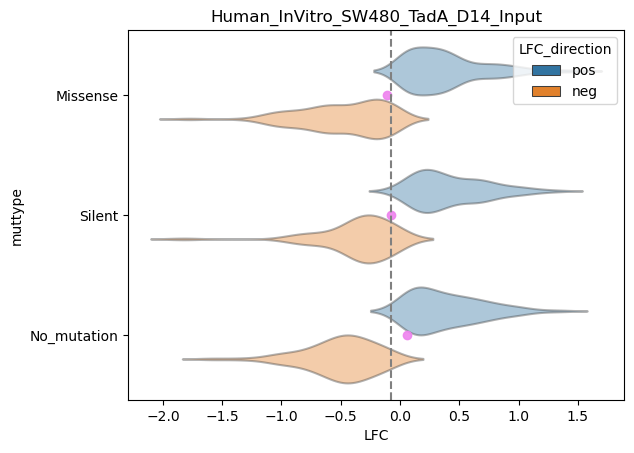

In [3]:
vals = ['D14_Input', 'D14_Input', 'D14_Input', 'D17_Input', 'D14_Input', 'D14_Input', ]

for screen, val in zip(screens, vals): 
    print(screen)
    df = pd.read_csv(workdir + '/rawdata/' + screen, sep='\t')
    parse_base_editing_results(df_InputGene = df, 
                               workdir      = workdir, 
                               input_gene   = input_gene, 
                               input_screen = screen, 
                               mut_col='Histogram_Category', val_col=val, 
                               gene_col='TargetGeneSymbol', edits_col='AminoAcidEdits',
                               )
    print()

In [4]:
# check output with previous output
import filecmp
import os
for f in os.listdir('../tests/SETDB1/screendata'):
    path1 = '../tests/SETDB1/screendata/'+f
    path2 = '../tests/SETDB1/SETDB1/screendata/'+f
    if os.path.exists(path1) and os.path.exists(path2): 
        if not filecmp.cmp(path1, path2):
            print(f)
    else: 
        print('A file doesnt exist')
        print(path1)


## randomize_preprocessed_be_results.py (3.1.5)

In [2]:
from randomize_preprocessed_be_results import randomize_be_results

In [4]:
# this cell would take 2x time with original code

for screen in screens: 
    print(screen)
    screen = screen.split('.')[0]
    df = pd.read_csv(workdir + '/SETDB1/screendata/' + input_gene + '_' + screen + '_Missense_edits_list.tsv', sep='\t')
    randomize_be_results(df_missense=df, 
                         workdir=workdir, 
                         input_gene=input_gene, 
                         input_screen=screen)


Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## af_structural_features.py

## calculate_lfc3d.py